In [3]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle

In [4]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [5]:
data = ert.load(dir+"res2dinv_inputs/southeast_interim.Dat")
#data = ert.load(dir+"res2dinv_inputs/ERT_western_perpendicular_gps.Dat")
print(data)

21/05/24 - 13:42:13 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 41 data: 292, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']


21/05/24 - 13:44:08 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
21/05/24 - 13:44:10 - pyGIMLi - INFO - Save RVector binary
21/05/24 - 13:44:10 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\9047969721668484571
21/05/24 - 13:44:10 - pyGIMLi - INFO - Save RVector binary
21/05/24 - 13:44:10 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\596150497359329731


292 [31.319373707408378,...,31.495430651007965]

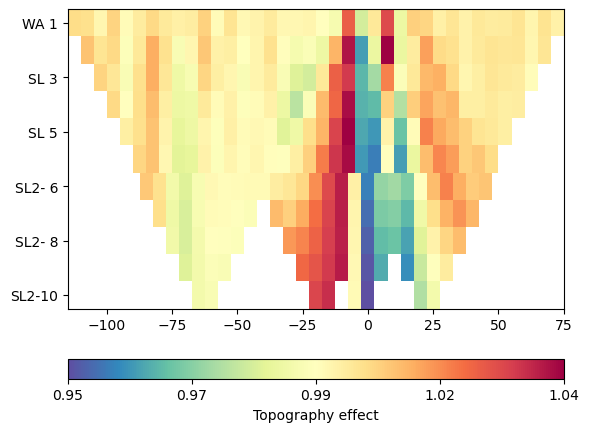

In [7]:
#data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x20cc5252f10>)

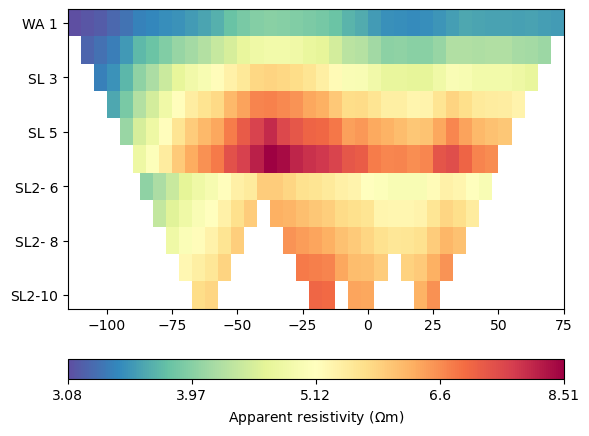

In [8]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x20cc54dbd90>)

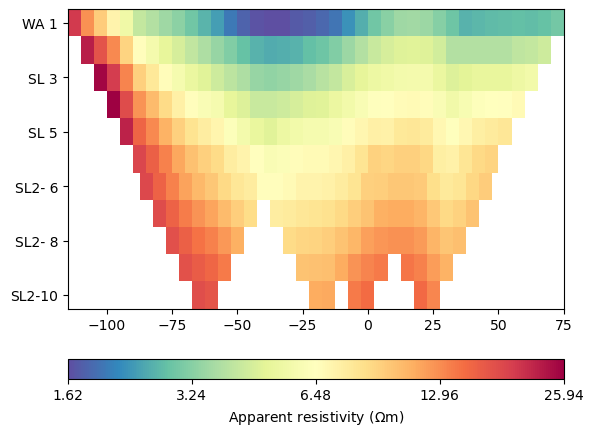

In [9]:
ert.showData(data)

21/05/24 - 13:44:28 - pyGIMLi - INFO - Found 2 regions.
21/05/24 - 13:44:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/05/24 - 13:44:28 - pyGIMLi - INFO - Found 2 regions.
21/05/24 - 13:44:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/05/24 - 13:44:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/05/24 - 13:44:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/05/24 - 13:44:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2342 Cells: 4364 Boundaries: 3432
21/05/24 - 13:44:28 - pyGIMLi - INFO - Use median(data values)=7.1325
21/05/24 - 13:44:28 - pyGIMLi - INFO - Created startmodel from forward operator: 812, min/max=7.132500/7.132500
21/05/24 - 13:44:28 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000020CFD063150>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000020CF9CB5BC0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000020CFCCEA890>
min/max (data): 1.62/25.94
min/max (error): 3.08%/8.51%
min/max (start model): 7.13/7.13
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  189.10
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    7.75 (dPhi = 94.55%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.88 (dPhi = 60.05%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.88)                   #
################################################################################


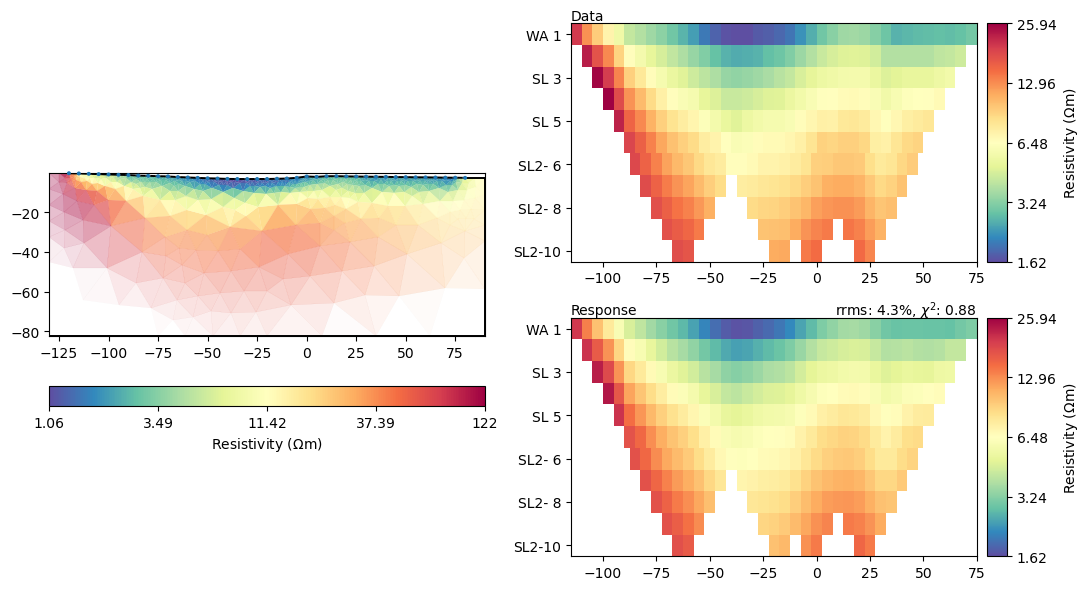

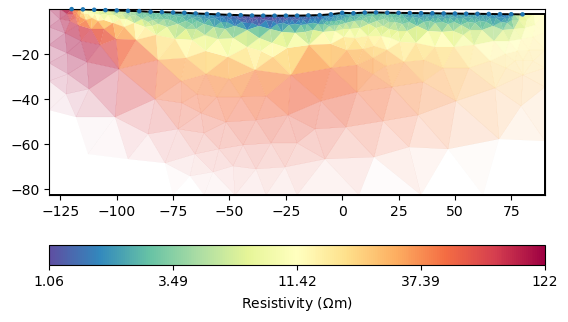

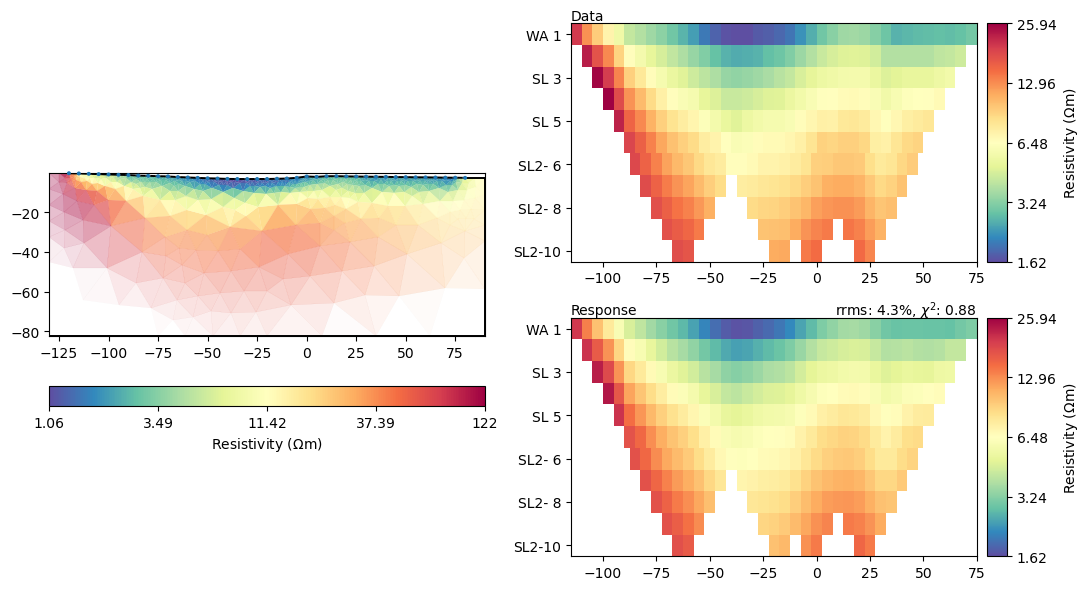

In [10]:
mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=20)

mgr.showResult()
mgr.showResultAndFit()

21/05/24 - 13:44:54 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

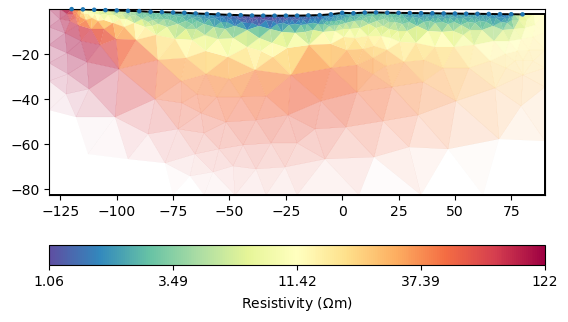

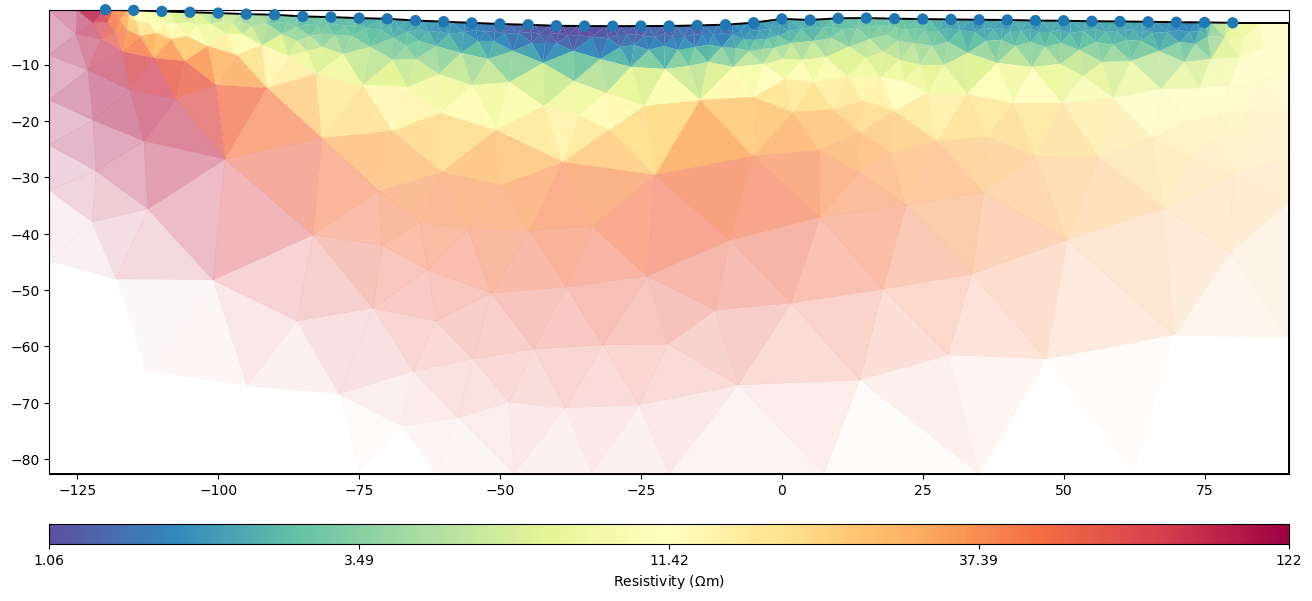

In [11]:
mgr.showResult(cMap="Spectral_r", logScale=True)
mgr.saveResult(dir+ 'pygimli/all_inversions')

0 -130.00257158134846 -0.2462
1 -130.00257158134846 -82.5759
2 90.00257158134846 -82.5759
3 90.00257158134846 -2.5759
4 -330.00257158134843 -0.2462
5 -330.00257158134843 -280.2462
6 290.00257158134843 -2.5759
7 290.00257158134843 -282.5759
8 -120.0 -0.2462
9 -118.75 -0.27455
10 -116.25 -0.33125
11 -115.0 -0.3596
12 -113.75 -0.405875
13 -111.25 -0.49842499999999995
14 -110.0 -0.5447
15 -108.75 -0.5834999999999999
16 -106.25 -0.6611
17 -105.0 -0.6999
18 -103.75 -0.73575
19 -101.25 -0.80745
20 -100.0 -0.8433
21 -98.75 -0.8896000000000001
22 -96.25 -0.9822
23 -95.0 -1.0285
24 -93.75 -1.0568499999999998
25 -91.25 -1.11355
26 -90.0 -1.1419
27 -88.75 -1.2165499999999998
28 -86.25 -1.36585
29 -85.0 -1.4405
30 -83.75 -1.46885
31 -81.25 -1.52555
32 -80.0 -1.5539
33 -78.75 -1.6001750000000001
34 -76.25 -1.692725
35 -75.0 -1.739
36 -73.75 -1.768825
37 -71.25 -1.828475
38 -70.0 -1.8583
39 -68.75 -1.93575
40 -66.25 -2.09065
41 -65.0 -2.1681
42 -63.75 -2.2187
43 -61.25 -2.3198999999999996
44 -60.0 -2

(-35.0, 10.0)

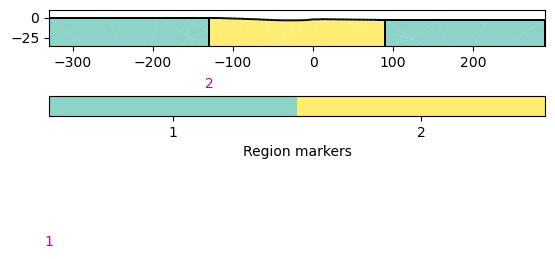

In [12]:
plc = mt.createParaMeshPLC(data, paraDX = 0.25, paraDZ= 0.25, boundary=1)
for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())

ax, _ = pg.show(plc)
ax.set_ylim(-35, 10)
#ax.set_xlim(-11,381)

(-150.0, 100.0)

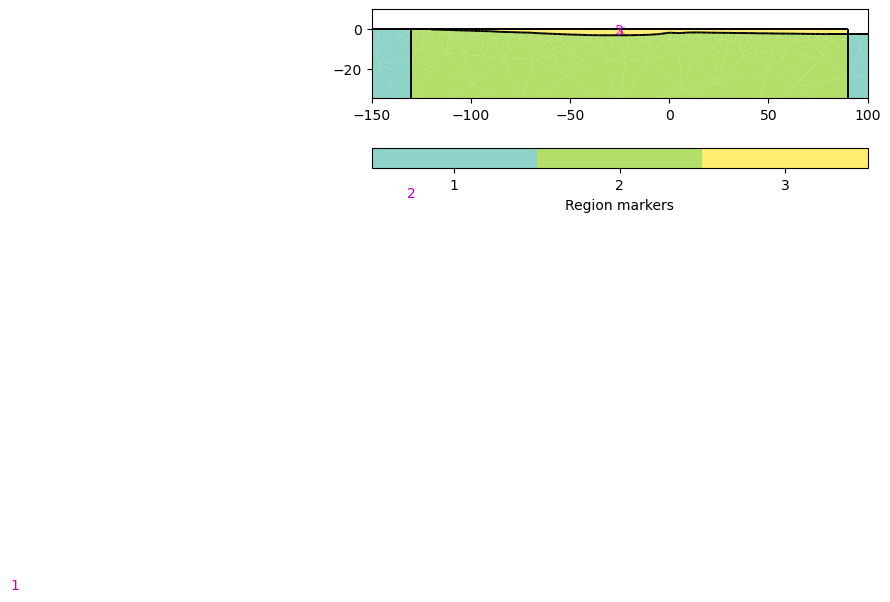

In [13]:
l1 = mt.createLine([-130.00257158134846,0], [-130.00257158134846, -5])
l2 = mt.createLine([-130.00257158134846,0], [90.00257158134846, 0])
l3 = mt.createLine([90.00257158134846,0], [90.00257158134846, -5])


plc2 = mt.mergePLC([plc, l1, l2, l3])
  
plc2.addRegionMarker([-25, -0.5], marker=3)  
#plc2.addRegionMarker([360, -1.5], marker=4)  

ax, _ = pg.show(plc2)
ax.set_ylim(-35, 10)
ax.set_xlim(-150,100)

21/05/24 - 13:46:23 - pyGIMLi - INFO - Found 3 regions.
21/05/24 - 13:46:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
21/05/24 - 13:46:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
21/05/24 - 13:46:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
21/05/24 - 13:46:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4041 Cells: 7688 Boundaries: 5962
21/05/24 - 13:46:23 - pyGIMLi - INFO - Use median(data values)=7.1325
21/05/24 - 13:46:23 - pyGIMLi - INFO - Created startmodel from forward operator: 1644, min/max=7.132500/7.132500
21/05/24 - 13:46:23 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000020CFD063150>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000020CF9CB5BC0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000020CC3FD1C40>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x0000020CC3FD2650>
min/max (data): 1.62/25.94
min/max (error): 3.08%/8.51%
min/max (start model): 7.13/7.13
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  142.23
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   24.77 (dPhi = 81.84%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =    0.44 (dPhi = 93.36%) lam: 10.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.44)                   #
####################################

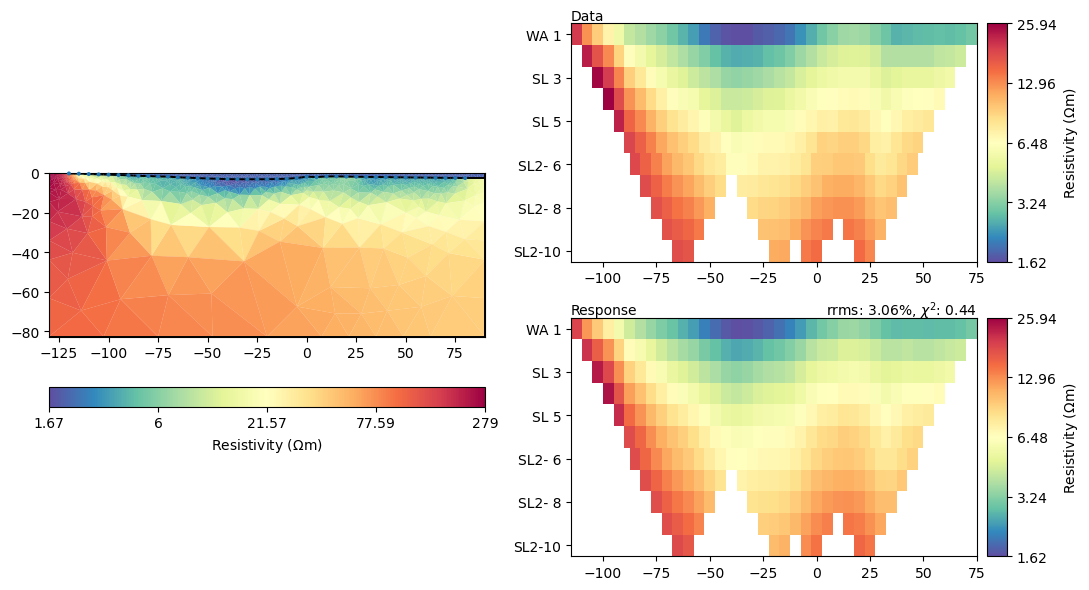

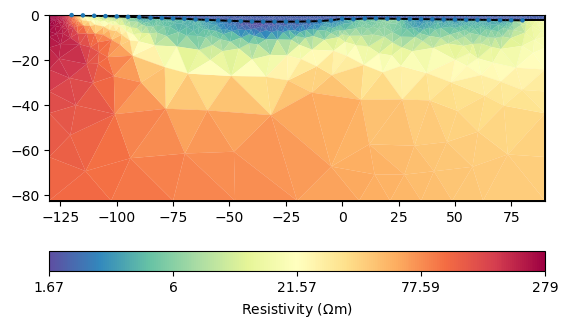

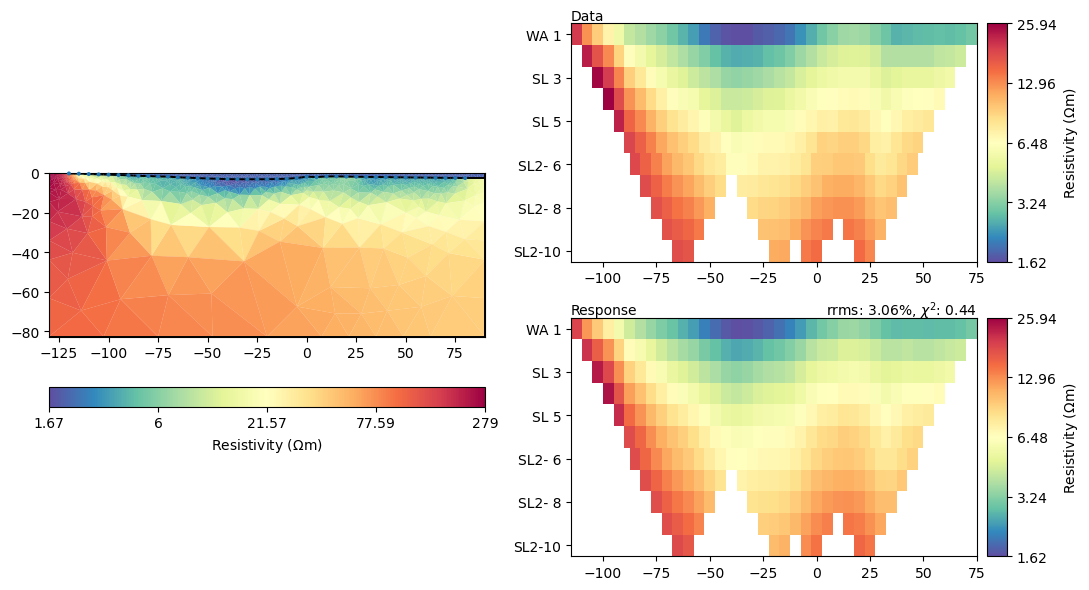

In [14]:
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)


mgr.inv.setRegularization(3, limits=[1, 2], zWeight=0.1)
#mgr.inv.setRegularization(4, limits=[3, 4], zWeight=0.1)

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10)
#mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, zWeight=0.4, RobustData=True, BlockyModel=True)

mgr.showResult(coverage=1)
mgr.showResultAndFit(coverage=1)

21/05/24 - 13:46:56 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

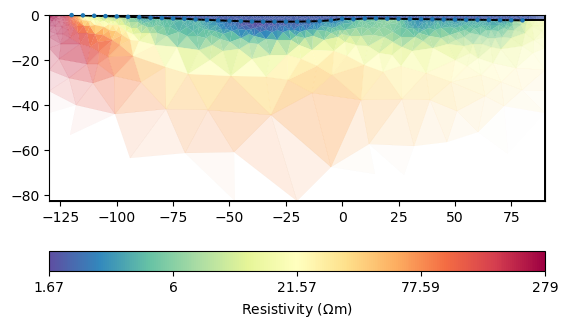

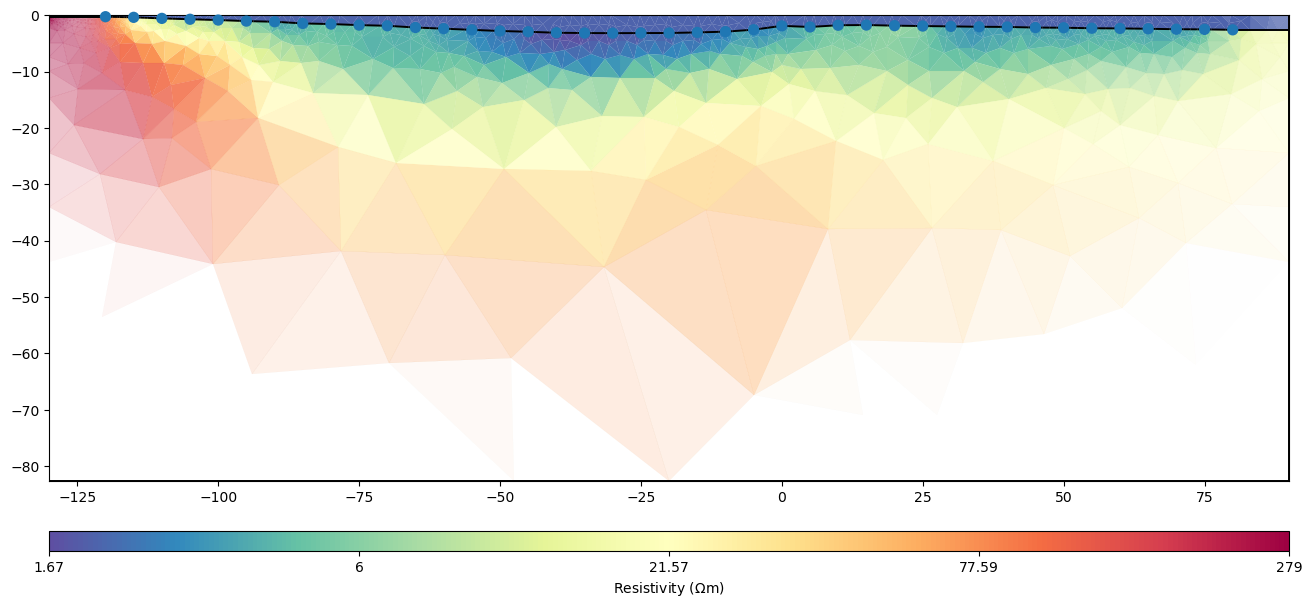

In [15]:
mgr.showResult()
mgr.saveResult(dir+ 'pygimli/all_inversions')

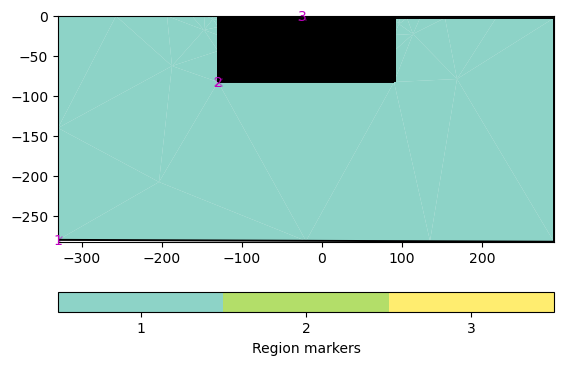

In [38]:
from pygimli.frameworks import PriorModelling
import numpy as np
import pygimli as pg

topography_coords = np.loadtxt(dir + "res2dinv_inputs/eastern_topo.txt")
xmin = -130
xmax = 90
ymin = -80
resolution_x = 0.25
resolution_y = 0.25
shave_off_top = 0.25  # Amount to shave off from the top

# Interpolate topography points
interpolated_topography = interp1d(topography_coords[:, 0], topography_coords[:, 1], kind='linear', fill_value='extrapolate')

# Create x coordinates for the grid
x = np.arange(xmin, xmax + resolution_x, resolution_x)

# Create an empty list to store the adjusted y-values
adjusted_topography = []

# Iterate over each x-coordinate and adjust the corresponding y-value by subtracting the shave off value
for x_val in x:
    y_val = interpolated_topography(x_val)
    adjusted_y_val = max(y_val - shave_off_top, ymin)  # Ensure the adjusted y-value doesn't go below ymin
    adjusted_topography.append(adjusted_y_val)

# Convert the list of adjusted y-values to a numpy array
adjusted_topography = np.array(adjusted_topography)

# Create a positional vector
grid_points = []
for x_val, y_val in zip(x, adjusted_topography):
    y_range = np.arange(y_val, ymin - resolution_y, -resolution_y)
    grid_points.extend([(x_val, y) for y in y_range])

# Convert the list of grid points to a numpy array
grid_points = np.array(grid_points)

posVec = [pg.Pos(pos) for pos in zip(grid_points[:, 0], grid_points[:, 1])]

# Plot the results

ax, _ = pg.show(plc2)
ax.scatter(grid_points[:, 0], grid_points[:, 1], s=1, color='black')  # Plot grid points



    



In [39]:
para = pg.Mesh(mgr.paraDomain)
para.setCellMarkers(pg.IVector(para.cellCount()))
# Initialize PriorModelling framework
fopDP = PriorModelling(para, posVec)

# Get the model values for all positions
resMesh = fopDP(mgr.model)
# Create a mesh and set cell markers
#np.savetxt(dir+"out.txt", np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh)))
out = np.column_stack((grid_points[:, 0], grid_points[:, 1], resMesh))

20/05/24 - 21:42:50 - pyGIMLi - INFO - Found 1 regions.


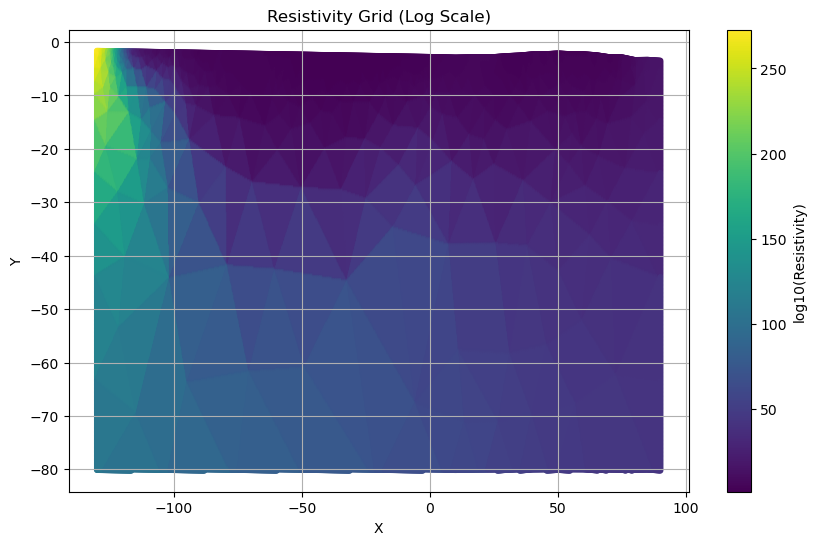

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'out' contains your data with x, y, and resistivity values
x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]

# Plotting the grid with colorbar on a logarithmic scale
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, c=resistivity_values, cmap='viridis', s=10)  # Apply log10 to resistivity values
plt.colorbar(label='log10(Resistivity)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Resistivity Grid (Log Scale)')
plt.grid(True)
plt.show()

In [43]:
permafrost_data = []

# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    # Filter data for the current x value
    data_x = out[out[:, 0] == x_value]

    # Calculate resistivity gradient in logarithmic space
    resistivity_gradient_log = np.gradient(np.log(data_x[:, 2]), data_x[:, 1])

    # Find the first depth where the gradient is negative and its absolute value is higher than 0.5
    negative_gradients_mask = (data_x[:, 2] > 10) & (resistivity_gradient_log < 0.02) 
    valid_depths = data_x[:, 1][negative_gradients_mask]
    valid_gradients = resistivity_gradient_log[negative_gradients_mask]

    # If valid depths are found, take the first one
    if len(valid_depths) > 0:
        top_permafrost_depth = valid_depths[0]
        gradient = valid_gradients[0]
        permafrost_data.append((x_value, top_permafrost_depth, gradient))

# Convert permafrost_data to numpy array
top_permafrost_depths = np.array(permafrost_data)

In [42]:
top_permafrost_depths = []

# Iterate over each unique x value
for x_value in np.unique(out[:, 0]):
    # Filter data for the current x value
    data_x = out[out[:, 0] == x_value]

    # Calculate resistivity gradient in logarithmic space
    resistivity_gradient_log = np.gradient(np.log(data_x[:, 2]), data_x[:, 1])

    # Filter gradients based on criteria
    valid_gradients_mask = (data_x[:, 2] > 10) & (np.abs(resistivity_gradient_log) > 0.4) & (resistivity_gradient_log < 0)  # Only positive gradients
    valid_gradients = resistivity_gradient_log[valid_gradients_mask]
    valid_depths = data_x[:, 1][valid_gradients_mask]

    # Find depth of the top of permafrost table with the maximum positive gradient
    if len(valid_depths) > 0:
        max_gradient_index = np.argmax(valid_gradients)
        top_permafrost_depth = valid_depths[max_gradient_index]
        top_permafrost_depths.append((x_value, top_permafrost_depth, valid_gradients[max_gradient_index]))

# Convert top_permafrost_depths to numpy array
top_permafrost_depths = np.array(top_permafrost_depths)

print("Top permafrost depths for each unique x value:")
print(top_permafrost_depths)




Top permafrost depths for each unique x value:
[[-120.5         -10.4636       -0.44769449]
 [-120.25         -1.7158       -0.50333535]
 [-120.           -4.218        -0.4886119 ]
 ...
 [  84.5         -17.0647       -0.44993268]
 [  89.75        -24.2263       -0.46716891]
 [  90.          -43.735        -0.51658098]]


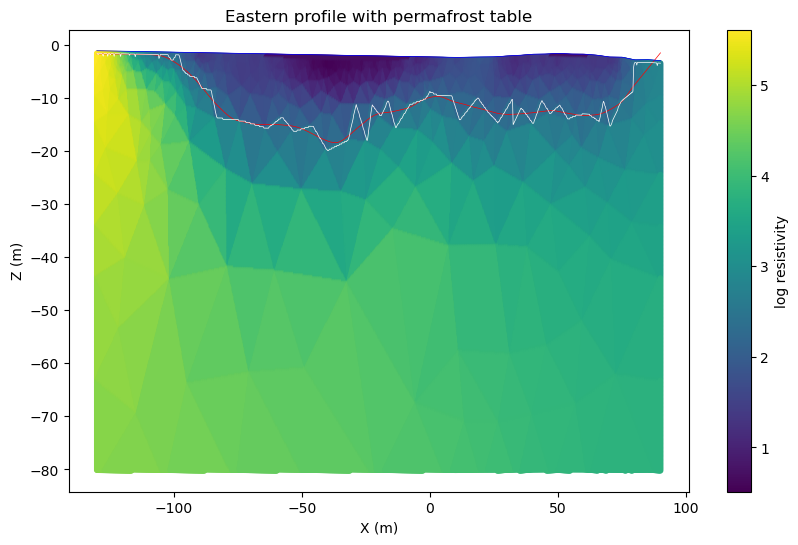

In [44]:
import statsmodels.api as sm
# Assuming 'out_with_ibpt' contains the original data with an additional column for IBPT depth
x_values = out[:, 0]
y_values = out[:, 1]
resistivity_values = out[:, 2]
ibpt_depth = top_permafrost_depths[:, 1]
ibpt_x = top_permafrost_depths[:, 0]  # Assuming the IBPT depth is stored in the last column

# Plotting
plt.figure(figsize=(10, 6))

# Plot resistivity values
plt.scatter(x_values, y_values, c=np.log(resistivity_values),cmap='viridis', s=10)  # Adjust s for point size
plt.colorbar(label='log resistivity')
plt.xlabel('X (m)')
plt.ylabel('Z (m)')
plt.title('Eastern profile with permafrost table')

# Plot IBPT depth as horizontal lines

# Apply moving average filter to smoothen the IBPT depth line
window_size = 1
#ibpt_depth_smoothed = np.convolve(ibpt_depth, np.ones(window_size) / window_size, mode='same')
lowess = sm.nonparametric.lowess
frac = 0.1  # The fraction of the data used when estimating each y-value
ibpt_depth_smoothed = lowess(ibpt_depth, ibpt_x, frac=frac)[:, 1]

# Plot smoothened IBPT depth line
plt.plot(ibpt_x, ibpt_depth_smoothed, color='r', linewidth=0.5)
plt.plot(ibpt_x, ibpt_depth, color='w', linewidth=0.5)
plt.plot(ibpt_x, adjusted_topography+0.5, color='b', linewidth=0.5)
# lower to higher
plt.show()

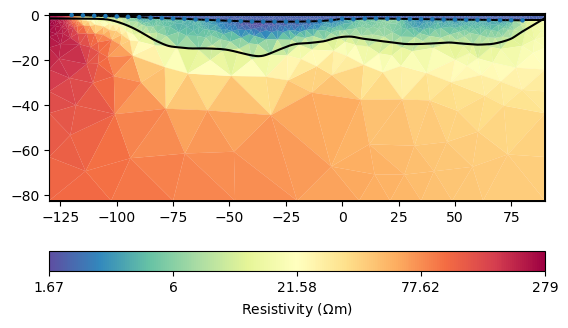

In [46]:
ax, cb = mgr.showResult(coverage=1)
ax.plot(ibpt_x, ibpt_depth_smoothed, "k-")